In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv('./all.csv', usecols=['Category', 'Path'])

In [3]:
breads = data['Category'].unique()
print(breads)
print('breads num', len(breads))

['Birman' 'saint_bernard' 'staffordshire_bull_terrier' 'japanese_chin'
 'american_pit_bull_terrier' 'newfoundland' 'scottish_terrier' 'chihuahua'
 'american_bulldog' 'Sphynx' 'basset_hound' 'keeshond' 'British_Shorthair'
 'Persian' 'great_pyrenees' 'english_setter' 'samoyed' 'Siamese'
 'Maine_Coon' 'pomeranian' 'Bengal' 'shiba_inu' 'Bombay'
 'yorkshire_terrier' 'leonberger' 'miniature_pinscher' 'Ragdoll' 'pug'
 'Egyptian_Mau' 'german_shorthaired' 'Russian_Blue' 'Abyssinian' 'boxer'
 'beagle' 'havanese' 'wheaten_terrier' 'english_cocker_spaniel']
breads num 37


In [4]:
data['Category'].value_counts()

great_pyrenees                200
english_setter                200
Birman                        200
american_bulldog              200
japanese_chin                 200
beagle                        200
saint_bernard                 200
boxer                         200
newfoundland                  200
leonberger                    200
english_cocker_spaniel        200
keeshond                      200
wheaten_terrier               200
havanese                      200
basset_hound                  200
samoyed                       200
scottish_terrier              199
german_shorthaired            199
shiba_inu                     199
British_Shorthair             197
Persian                       195
Russian_Blue                  193
Siamese                       193
Maine_Coon                    193
staffordshire_bull_terrier    191
Sphynx                        190
Ragdoll                       186
Bengal                        185
Abyssinian                    185
yorkshire_terr

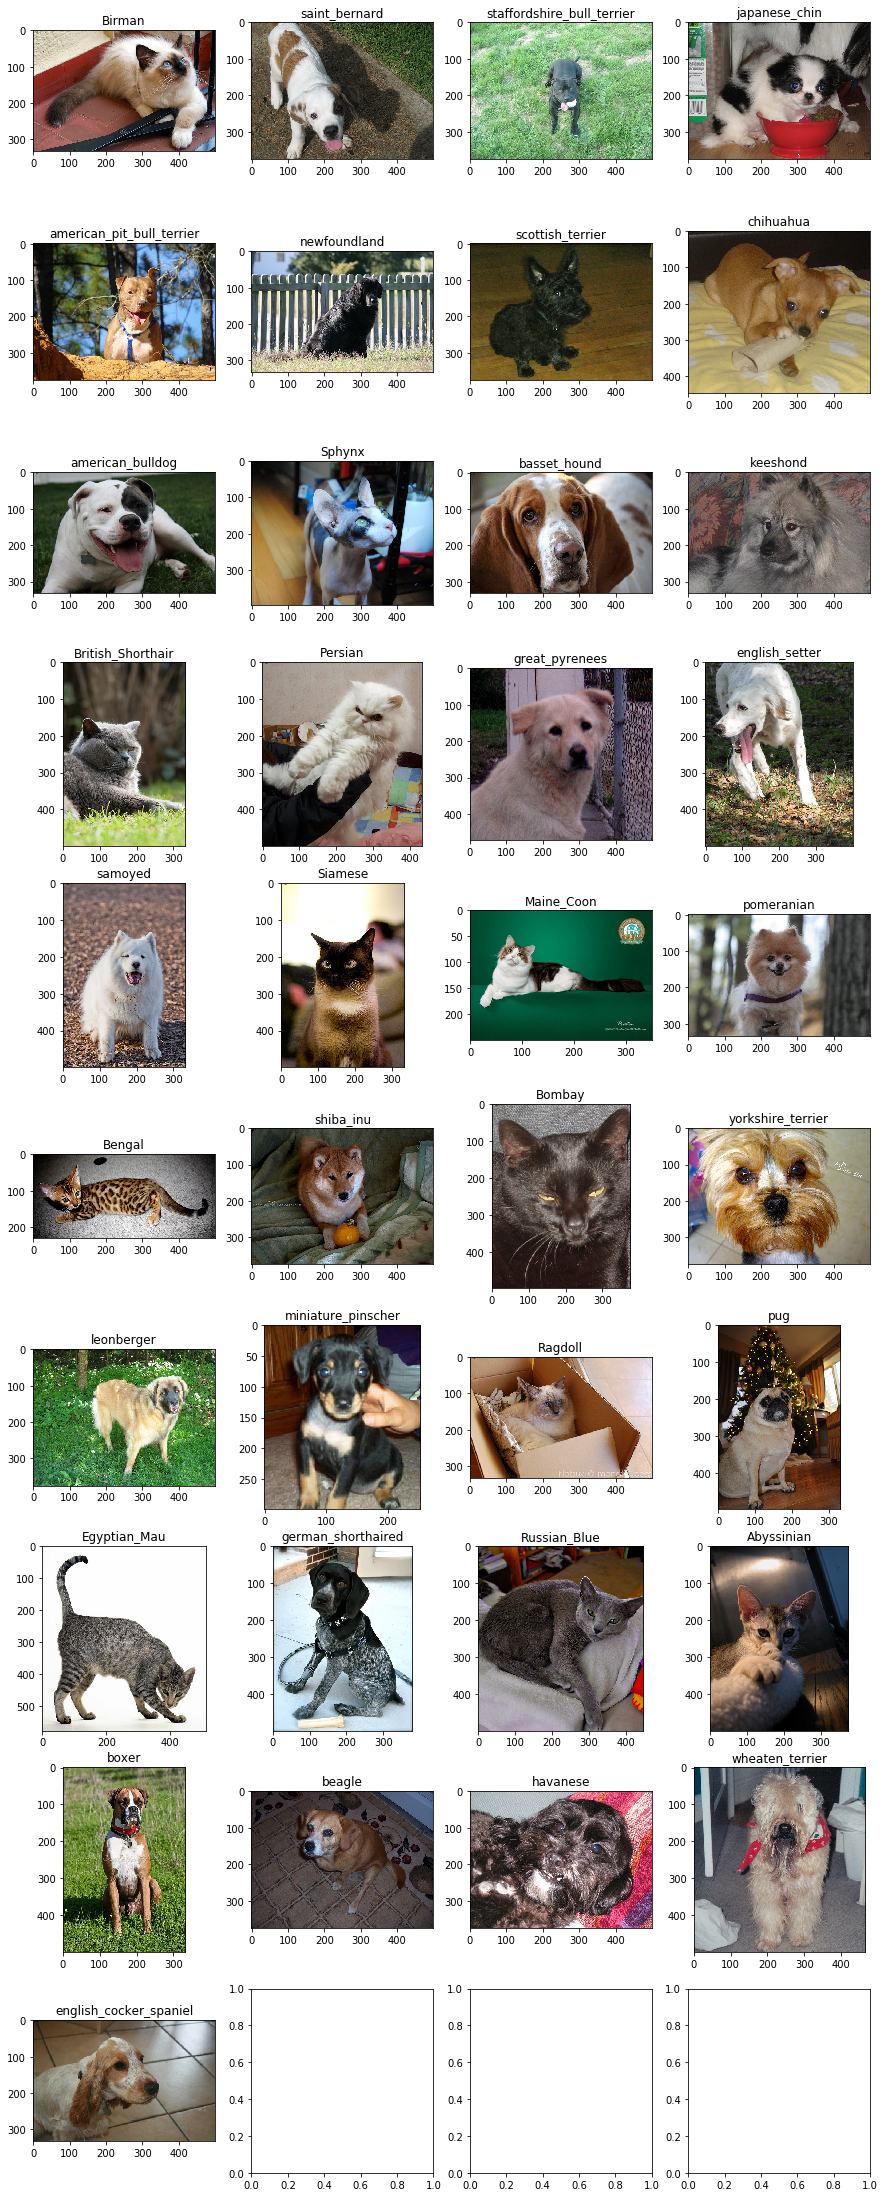

In [5]:
fig, axes = plt.subplots(10, 4)
fig.set_figwidth(15)
fig.set_figheight(40)

for i in range(len(breads)):
    path = data[data['Category'] == breads[i]]['Path'].iloc[0]
    image = plt.imread(path)
    
    axes.reshape(-1)[i].imshow(image)
    axes.reshape(-1)[i].set_title(breads[i])

plt.show()

In [74]:
from keras_preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1. / 255,
#         rotation_range=10,
#         zoom_range=0.1,
#         brightness_range=(0.7, 1.3),
#         horizontal_flip=True
)

train_generator = train_datagen.flow_from_dataframe(
        dataframe=data,
        directory='.',
        x_col='Path',
        y_col='Category',
        class_mode='categorical',
        batch_size=9)

Found 7100 validated image filenames belonging to 37 classes.


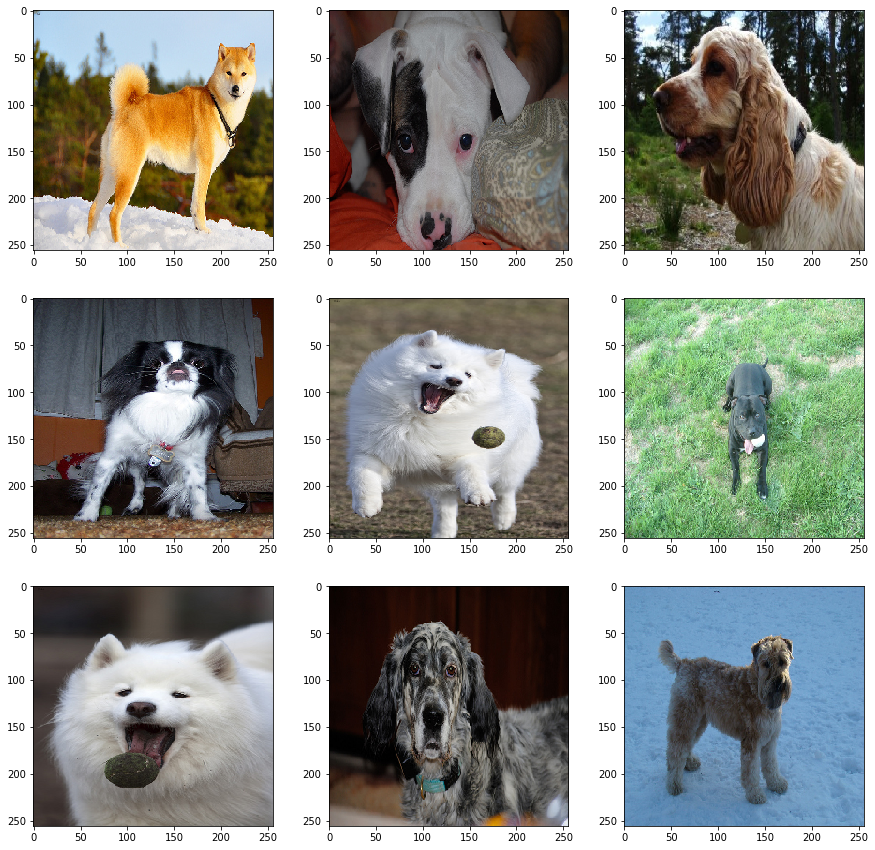

In [76]:
fig, axes = plt.subplots(3, 3)
fig.set_figwidth(15)
fig.set_figheight(15)

batch = train_generator.next()[0]
# print(len(batch))
# plt.imshow(batch[0])

for i in range(len(batch)):
    axes.reshape(-1)[i].imshow(batch[i])
plt.show()